Credits (Udemy Course) - https://www.udemy.com/course/complete-tensorflow-2-and-keras-deep-learning-bootcamp/

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("DATA/cancer_classification.csv")

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
(df['benign_0__mal_1'].value_counts()/df.shape[0])*100

1    62.741652
0    37.258348
Name: benign_0__mal_1, dtype: float64

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

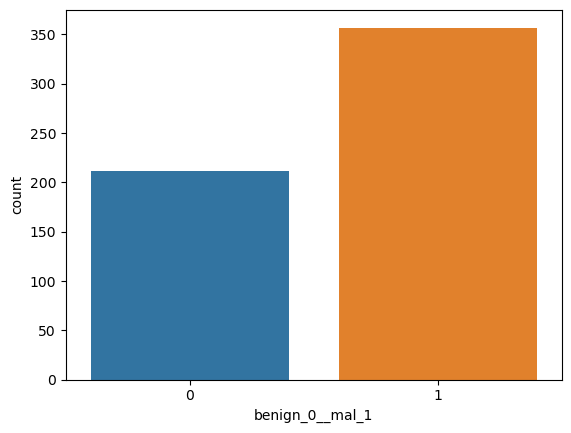

In [7]:
sns.countplot(x = 'benign_0__mal_1', data = df)

In [14]:
df.corr()['benign_0__mal_1'].sort_values()[:-1]

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [15]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [22]:
model = Sequential()

model.add(Dense(units = 30 ,activation='relu'))
model.add(Dense(units = 15 ,activation='relu'))
model.add(Dense(units = 15 ,activation='relu'))

model.add(Dense(units = 1 ,activation='sigmoid')) # as this is binary classification problem

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [24]:
model.fit(x = X_train,
          y = y_train,
          epochs = 600,
          verbose = 1,
          validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 28ms/step - loss: 0.6167 - val_loss: 0.6024
Epoch 2/600
14/14 [==============================] - 0s 12ms/step - loss: 0.5647 - val_loss: 0.5414
Epoch 3/600
14/14 [==============================] - 0s 12ms/step - loss: 0.5005 - val_loss: 0.4739
Epoch 4/600
14/14 [==============================] - 0s 14ms/step - loss: 0.4387 - val_loss: 0.4107
Epoch 5/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3763 - val_loss: 0.3493
Epoch 6/600
14/14 [==============================] - 0s 15ms/step - loss: 0.3202 - val_loss: 0.3002
Epoch 7/600
14/14 [==============================] - 0s 16ms/step - loss: 0.2799 - val_loss: 0.2619
Epoch 8/600
14/14 [==============================] - 0s 12ms/step - loss: 0.2516 - val_loss: 0.2427
Epoch 9/600
14/14 [==============================] - 0s 13ms/step - loss: 0.2203 - val_loss: 0.2178
Epoch 10/600
14/14 [==============================] - 0s 12ms/step - loss: 0.2009 - val_loss: 0.2105

14/14 [==============================] - 0s 15ms/step - loss: 0.0344 - val_loss: 0.1497
Epoch 163/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0387 - val_loss: 0.1356
Epoch 164/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0391 - val_loss: 0.1588
Epoch 165/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0326 - val_loss: 0.1307
Epoch 166/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0391 - val_loss: 0.1576
Epoch 167/600
14/14 [==============================] - 0s 31ms/step - loss: 0.0331 - val_loss: 0.1380
Epoch 168/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0316 - val_loss: 0.1327
Epoch 169/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0323 - val_loss: 0.1450
Epoch 170/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0314 - val_loss: 0.1418
Epoch 171/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0305 - val_loss: 0

14/14 [==============================] - 0s 12ms/step - loss: 0.0097 - val_loss: 0.1841
Epoch 323/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0131 - val_loss: 0.2922
Epoch 324/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0227 - val_loss: 0.2154
Epoch 325/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0146 - val_loss: 0.1837
Epoch 326/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0155 - val_loss: 0.2020
Epoch 327/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0136 - val_loss: 0.2103
Epoch 328/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0116 - val_loss: 0.1982
Epoch 329/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0117 - val_loss: 0.1907
Epoch 330/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0175 - val_loss: 0.2813
Epoch 331/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0185 - val_loss: 0

14/14 [==============================] - 0s 12ms/step - loss: 0.0017 - val_loss: 0.3856
Epoch 483/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0026 - val_loss: 0.3684
Epoch 484/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0014 - val_loss: 0.3618
Epoch 485/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0033 - val_loss: 0.3839
Epoch 486/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0192 - val_loss: 0.3728
Epoch 487/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0156 - val_loss: 0.4456
Epoch 488/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0107 - val_loss: 0.4062
Epoch 489/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0050 - val_loss: 0.3166
Epoch 490/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0222 - val_loss: 0.4503
Epoch 491/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0094 - val_loss: 0

14/14 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 0.4099
Epoch 562/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.4445
Epoch 563/600
14/14 [==============================] - 0s 12ms/step - loss: 8.0998e-04 - val_loss: 0.4082
Epoch 564/600
14/14 [==============================] - 0s 11ms/step - loss: 8.1262e-04 - val_loss: 0.4249
Epoch 565/600
14/14 [==============================] - 0s 11ms/step - loss: 7.3691e-04 - val_loss: 0.4236
Epoch 566/600
14/14 [==============================] - 0s 11ms/step - loss: 6.2290e-04 - val_loss: 0.4179
Epoch 567/600
14/14 [==============================] - 0s 11ms/step - loss: 6.4913e-04 - val_loss: 0.4210
Epoch 568/600
14/14 [==============================] - 0s 12ms/step - loss: 5.5064e-04 - val_loss: 0.4214
Epoch 569/600
14/14 [==============================] - 0s 12ms/step - loss: 5.4569e-04 - val_loss: 0.4272
Epoch 570/600
14/14 [==============================] - 0s 12ms/step 

In [25]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

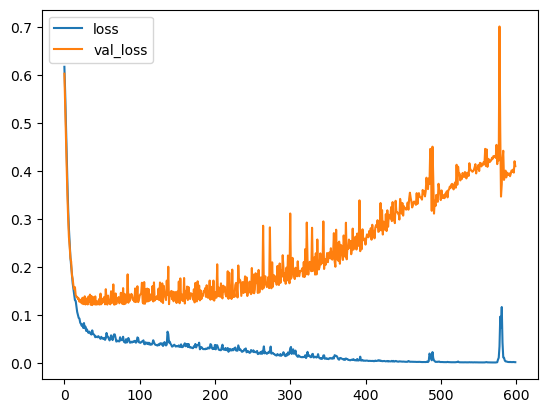

In [26]:
losses.plot()

In [42]:
model = Sequential()

model.add(Dense(units = 30 ,activation='relu'))
model.add(Dense(units = 15 ,activation='relu'))
model.add(Dense(units = 15 ,activation='relu'))

model.add(Dense(units = 1 ,activation='sigmoid')) # as this is binary classification problem

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [41]:
early_stop = EarlyStopping( monitor='val_loss',
                            mode='min',
                            patience=15,
                            verbose=1)

In [43]:
model.fit(x = X_train,
          y = y_train,
          epochs = 600,
          verbose = 1,
          validation_data = (X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 4s 71ms/step - loss: 0.6777 - val_loss: 0.6598
Epoch 2/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6462 - val_loss: 0.6250
Epoch 3/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6105 - val_loss: 0.5825
Epoch 4/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5638 - val_loss: 0.5269
Epoch 5/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5068 - val_loss: 0.4652
Epoch 6/600
14/14 [==============================] - 0s 12ms/step - loss: 0.4423 - val_loss: 0.3960
Epoch 7/600
14/14 [==============================] - 0s 11ms/step - loss: 0.3749 - val_loss: 0.3303
Epoch 8/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3171 - val_loss: 0.2778
Epoch 9/600
14/14 [==============================] - 0s 12ms/step - loss: 0.2741 - val_loss: 0.2361
Epoch 10/600
14/14 [==============================] - 0s 12ms/step - loss: 0.2385 - val_loss: 0.2102

In [44]:
early_stop_model_losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

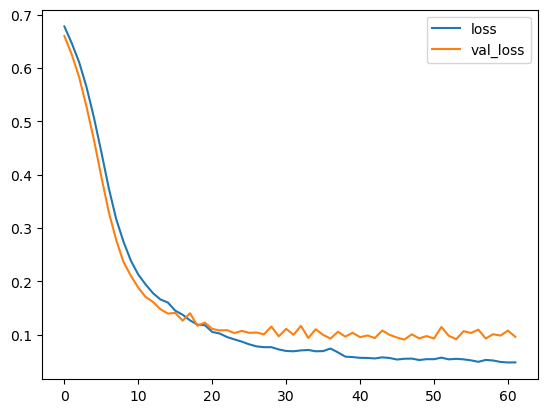

In [45]:
early_stop_model_losses.plot()

In [46]:
model = Sequential()

model.add(Dense(units = 30 ,activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 15 ,activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 15 ,activation='relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 1 ,activation='sigmoid')) # as this is binary classification problem

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [47]:
model.fit(x = X_train,
          y = y_train,
          epochs = 600,
          verbose = 1,
          validation_data = (X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 5s 70ms/step - loss: 0.6991 - val_loss: 0.6659
Epoch 2/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6624 - val_loss: 0.6370
Epoch 3/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6234 - val_loss: 0.5961
Epoch 4/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5912 - val_loss: 0.5444
Epoch 5/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5393 - val_loss: 0.4838
Epoch 6/600
14/14 [==============================] - 0s 13ms/step - loss: 0.4997 - val_loss: 0.4235
Epoch 7/600
14/14 [==============================] - 0s 12ms/step - loss: 0.4631 - val_loss: 0.3718
Epoch 8/600
14/14 [==============================] - 0s 12ms/step - loss: 0.4259 - val_loss: 0.3267
Epoch 9/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3761 - val_loss: 0.2850
Epoch 10/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3587 - val_loss: 0.2582

<AxesSubplot:>

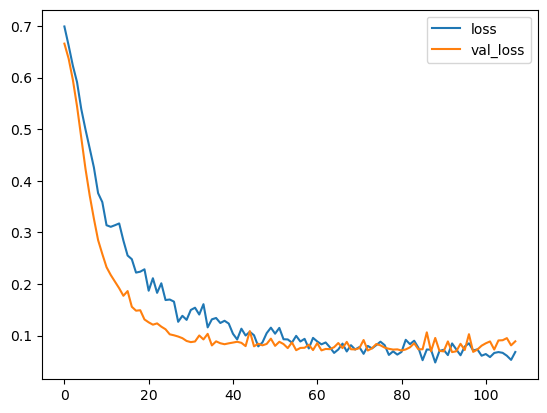

In [48]:
dropout_early_stop_model_losses = pd.DataFrame(model.history.history)
dropout_early_stop_model_losses.plot()

In [56]:
predictions = (model.predict(X_test) > 0.5).astype("int64")

5/5 [==============================] - 0s 4ms/step


In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [58]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
